In [1]:
from src.loader import modelLoader
import cv2
import numpy as np
from findpeaks import findpeaks

loader = modelLoader('3A_ref')
loader.cuda()
model = loader.model

In [2]:
from src.loader import sampler
s = sampler('bulkice')

# 總結
- 梯度對特徵提取效果不理想
- laplace對邊的提取極好
- laplace $k=5$ 有效將邊粗化 $k=3$ 有效將點提取

In [3]:
load = s[0]
last = []
img1 = load['image'][0]
lp3 = cv2.Laplacian(img1,cv2.CV_16S,ksize=3)
lp3 = cv2.convertScaleAbs(lp3)
lp5 = cv2.Laplacian(img1,cv2.CV_16S,ksize=5)
lp5 = cv2.convertScaleAbs(lp5)
see = np.concatenate((img1, lp3, lp5),axis=1)
see = cv2.resize(see, (1600,400))
last.append(see)
last = np.concatenate(last,axis=0)

# sampler
- s[n]: dict {'image': np.ndarray, 'info': dict, 'position': np.ndarray (n * 3)}
- 'info': dict {'scale', 'lattice', 'ele_num', 'ele_name', 'comment'}

In [4]:
from src.tools import circPlot
from src.const import o_dict, h_dict
img2 = cv2.resize(lp5,(256,256))
k = circPlot(img2, load['position']['O'],o_dict)

[findpeaks] >Finding peaks in 2d-array using topology method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using topology method with limit at 30.
[findpeaks] >Detect peaks using topology method with limit at 30.
[findpeaks] >Fin.


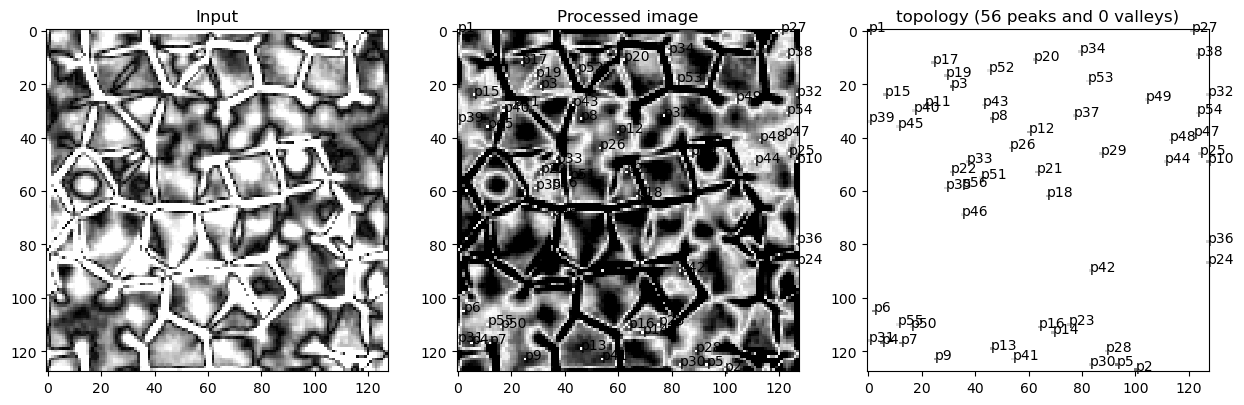

(<AxesSubplot: title={'center': 'Input'}>,
 <AxesSubplot: title={'center': 'Processed image'}>,
 <AxesSubplot: title={'center': 'topology (56 peaks and 0 valleys)'}>)

In [5]:
fp = findpeaks(method='topology', limit= 30)
r = fp.fit(lp5)
r['persistence']
fp.plot()

In [6]:
cv2.imshow("hi ", k)
cv2.waitKey(0)
cv2.destroyAllWindows()